In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "runMaria4-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20201005-DataSheet-Maria4.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename,Sample
0,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz,MS-76_S1
1,MS-77,MS-77,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S2,GC,human,BCRh,Unknown,MS-77,no,MS-77_S2_L001_R1_001.fastq.gz,MS-77_S2
2,MS-78,MS-78,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S3,GC,human,BCRh,Unknown,MS-78,no,MS-78_S3_L001_R1_001.fastq.gz,MS-78_S3
3,MS-79,MS-79,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S4,GC,human,BCRh,Unknown,MS-79,no,MS-79_S4_L001_R1_001.fastq.gz,MS-79_S4
4,MS-82,MS-82,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S7,GC,human,BCRh,Unknown,MS-82,no,MS-82_S7_L001_R1_001.fastq.gz,MS-82_S7


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles

['cdr3-clones-GC-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,MS-76_S1,CARDPLGHWYDDSGTGGYWGQGTLVT,7268
1,MS-76_S1,CAPCTGFGSGWSDAFDIWGQGTMVT,5458
2,MS-76_S1,CARDVGGDTSWYNPGPGMDVWGQGTTVT,4455
3,MS-76_S1,CARHQLEVYFDYWGQGTLVT,3571
4,MS-76_S1,CARGQIVRFRDFTTRDKLTWFDSWGQGTLVT,2256


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
14533,MS-85_S10,YARGYRLRSSYFDYWGQGTLVT,1
14534,MS-85_S10,YARTNITMIGINDLWGQGTLVT,1
14535,MS-85_S10,YARVANPIRGVLVYFDYWGQGTLVT,1
14536,MS-85_S10,YASSGWDYYYYGMDVWGQGTTVT,1
14537,MS-85_S10,YTVALDAFDIWGQGTMVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename
0,MS-76_S1,CARDPLGHWYDDSGTGGYWGQGTLVT,7268,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz
1,MS-76_S1,CAPCTGFGSGWSDAFDIWGQGTMVT,5458,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz
2,MS-76_S1,CARDVGGDTSWYNPGPGMDVWGQGTTVT,4455,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz
3,MS-76_S1,CARHQLEVYFDYWGQGTLVT,3571,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz
4,MS-76_S1,CARGQIVRFRDFTTRDKLTWFDSWGQGTLVT,2256,MS-76,MS-76,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201005-maria,S1,GC,human,BCRh,Unknown,MS-76,no,MS-76_S1_L001_R1_001.fastq.gz


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,Unknown,MS-76_S1,CAEDLARDGDPYYYLYYGLDVWGQGTTVT,1
1,Unknown,MS-76_S1,CAEDWSGQYYFDYWGQGTLVT,1
2,Unknown,MS-76_S1,CAEGWYYYDHYGMDVWGQGTTVT,1
3,Unknown,MS-76_S1,CAGDAKEMTPDGDAFDIWGQGTMVT,1
4,Unknown,MS-76_S1,CAGGQFLSSSWYVGLYYYYYYGMDVWGQGTTVT,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,MS-76_S1,101521
1,MS-77_S2,88932
2,MS-78_S3,91602
3,MS-79_S4,69488
4,MS-82_S7,104354


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,Unknown,MS-76_S1,CAEDLARDGDPYYYLYYGLDVWGQGTTVT,1,101521
1,Unknown,MS-76_S1,CAEDWSGQYYFDYWGQGTLVT,1,101521
2,Unknown,MS-76_S1,CAEGWYYYDHYGMDVWGQGTTVT,1,101521
3,Unknown,MS-76_S1,CAGDAKEMTPDGDAFDIWGQGTMVT,1,101521
4,Unknown,MS-76_S1,CAGGQFLSSSWYVGLYYYYYYGMDVWGQGTTVT,1,101521


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
14533,Unknown,MS-85_S10,YARTNITMIGINDLWGQGTLVT,1,91088
14534,Unknown,MS-85_S10,YARVANPIRGVLVYFDYWGQGTLVT,1,91088
14535,Unknown,MS-85_S10,YASSGWDYYYYGMDVWGQGTTVT,1,91088
14536,Unknown,MS-85_S10,YTVALDAFDIWGQGTMVT,1,91088
14537,Unknown,MS-85_S10,YVHGTDNFFLFDYWGQGTLVT,3,91088


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,Unknown,MS-76_S1,CAEDLARDGDPYYYLYYGLDVWGQGTTVT,1,101521,0.000985
1,Unknown,MS-76_S1,CAEDWSGQYYFDYWGQGTLVT,1,101521,0.000985
2,Unknown,MS-76_S1,CAEGWYYYDHYGMDVWGQGTTVT,1,101521,0.000985
3,Unknown,MS-76_S1,CAGDAKEMTPDGDAFDIWGQGTMVT,1,101521,0.000985
4,Unknown,MS-76_S1,CAGGQFLSSSWYVGLYYYYYYGMDVWGQGTTVT,1,101521,0.000985


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['MS-76_S1',
 'MS-77_S2',
 'MS-78_S3',
 'MS-79_S4',
 'MS-82_S7',
 'MS-83_S8',
 'MS-84_S9',
 'MS-85_S10']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,MS-77_S2,MS-76_S1,76.368461,74.463412
1,MS-78_S3,MS-76_S1,42.071134,40.287231
2,MS-79_S4,MS-76_S1,45.124338,12.716581
3,MS-82_S7,MS-76_S1,31.761121,0.006895
4,MS-83_S8,MS-76_S1,31.506376,20.666660


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown
1,MS-78_S3,MS-76_S1,42.071134,40.287231,Unknown,Unknown
2,MS-79_S4,MS-76_S1,45.124338,12.716581,Unknown,Unknown
3,MS-82_S7,MS-76_S1,31.761121,0.006895,Unknown,Unknown
4,MS-83_S8,MS-76_S1,31.506376,20.666660,Unknown,Unknown


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,11,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown
1,5,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown
2,0,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown
3,22,MS-78_S3,MS-79_S4,66.156852,45.659682,Unknown,Unknown
4,1,MS-78_S3,MS-76_S1,42.071134,40.287231,Unknown,Unknown


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,11,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same
1,5,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same
2,0,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same
3,22,MS-78_S3,MS-79_S4,66.156852,45.659682,Unknown,Unknown,same
4,1,MS-78_S3,MS-76_S1,42.071134,40.287231,Unknown,Unknown,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runMaria4-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,11,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same
1,1,5,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same
2,2,0,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same
3,3,22,MS-78_S3,MS-79_S4,66.156852,45.659682,Unknown,Unknown,same
4,4,1,MS-78_S3,MS-76_S1,42.071134,40.287231,Unknown,Unknown,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,11,MS-82_S7,MS-83_S8,99.420243,99.345131,Unknown,Unknown,same,MS-82_S7->MS-83_S8,purple
1,1,5,MS-85_S10,MS-76_S1,80.135693,79.500793,Unknown,Unknown,same,MS-85_S10->MS-76_S1,purple
2,2,0,MS-77_S2,MS-76_S1,76.368461,74.463412,Unknown,Unknown,same,MS-77_S2->MS-76_S1,purple
3,3,22,MS-78_S3,MS-79_S4,66.156852,45.659682,Unknown,Unknown,same,MS-78_S3->MS-79_S4,purple
4,4,1,MS-78_S3,MS-76_S1,42.071134,40.287231,Unknown,Unknown,same,MS-78_S3->MS-76_S1,purple


Wrote runMaria4-IGH-HUMAN-shared-clones-all.pdf to disk


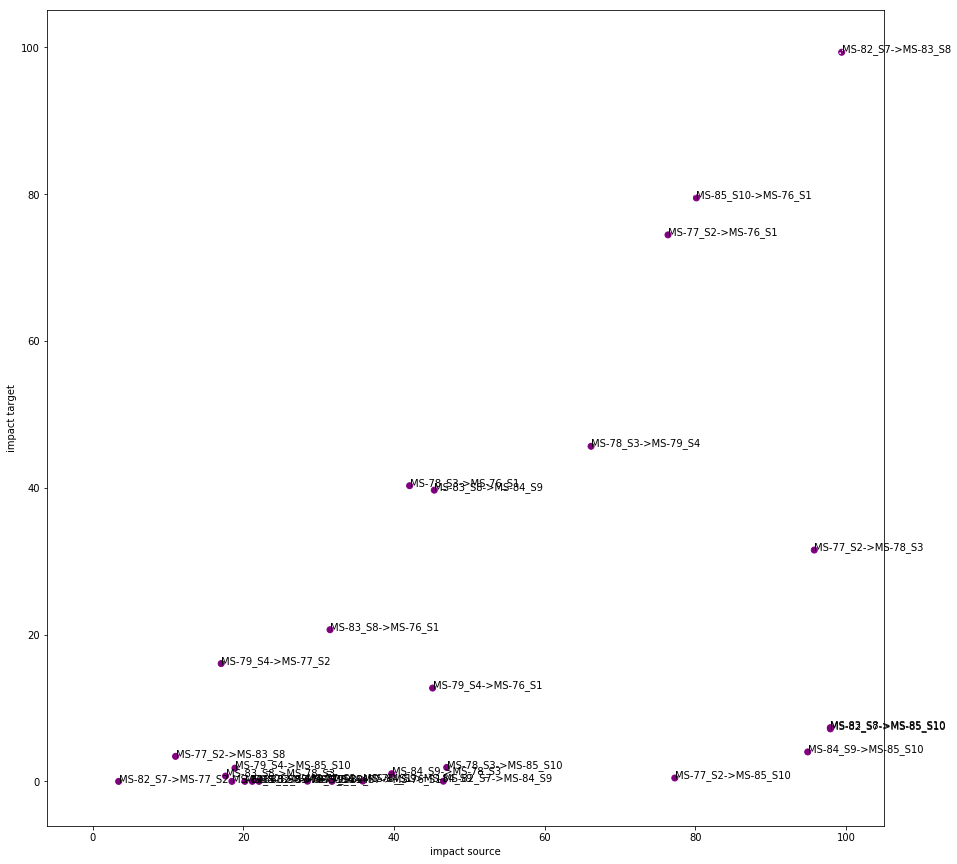

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color


Wrote runMaria4-IGH-HUMAN-shared-clones-different-ids.pdf to disk


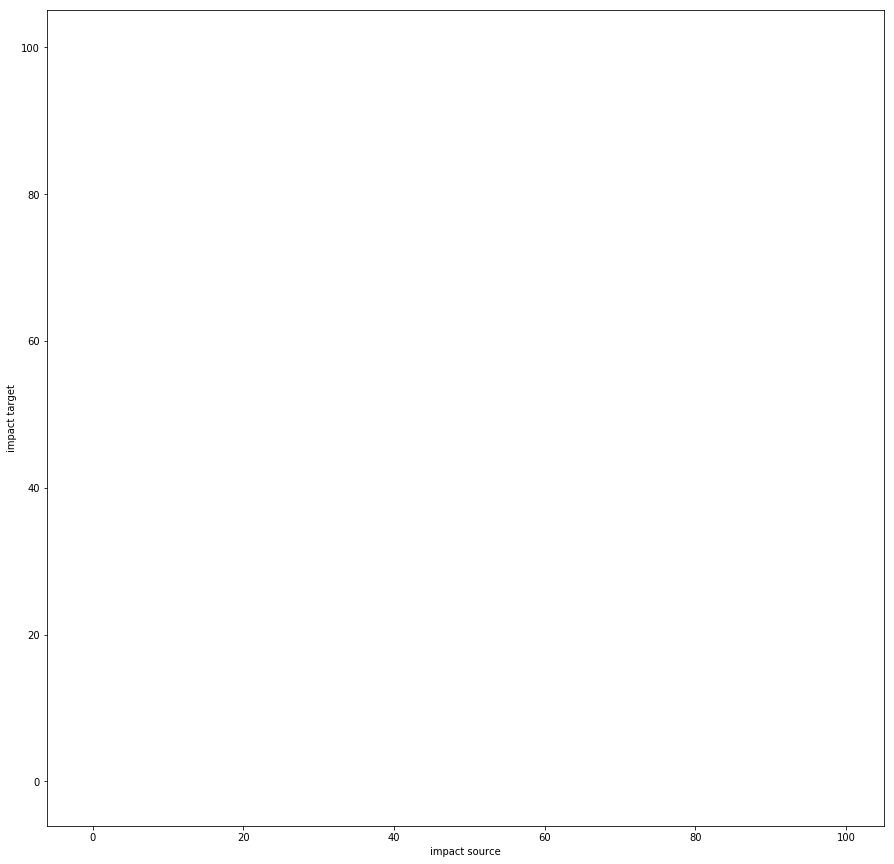

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)